Amanda Baker, andrewID: adbaker

## Problem 1: 
#### Part i:

In [1]:
# using list comprehension in this version
import re

def parse_hms_lc(t):
    'Takes a string representation of time duration and returns a tuple of hours, mins, and seconds'
    start_lst = [0 * 3 for i in range(0,3)]
    split_t = re.split(':', t)
    t_lst = [int(i) for i in split_t]
    for i in range(len(t_lst)):
        start_lst[-len(t_lst)+i] = t_lst[i]
    return tuple(start_lst)

# played around with the time module in this version
import time

def parse_hms(t):
    'Takes a string representation of time duration and returns a tuple of hours, mins, and seconds'
    try:
        full = time.strptime(t, '%H:%M:%S')
    except ValueError:
        if len(t) > 2:
            full = time.strptime(t, '%M:%S')
        else:
            full = time.strptime(t, '%S')
    return full.tm_hour, full.tm_min, full.tm_sec

# print statements for both versions
# parse_hms and parse_hms_lc can be used interchangeable in problem 1: part iv
print("parse_hms('2:34:16') ->", parse_hms('2:34:16'))
print("parse_hms('14:21:56') ->", parse_hms('14:21:56'))
print("parse_hms('45:00') ->", parse_hms('45:00'))
print("parse_hms('23') ->", parse_hms('23'))
print('\n')
print("parse_hms_lc('2:34:16') ->", parse_hms_lc('2:34:16'))
print("parse_hms_lc('14:21:56') ->", parse_hms_lc('14:21:56'))
print("parse_hms_lc('45:00') ->", parse_hms_lc('45:00'))
print("parse_hms_lc('23') ->", parse_hms_lc('23'))

parse_hms('2:34:16') -> (2, 34, 16)
parse_hms('14:21:56') -> (14, 21, 56)
parse_hms('45:00') -> (0, 45, 0)
parse_hms('23') -> (0, 0, 23)


parse_hms_lc('2:34:16') -> (2, 34, 16)
parse_hms_lc('14:21:56') -> (14, 21, 56)
parse_hms_lc('45:00') -> (0, 45, 0)
parse_hms_lc('23') -> (0, 0, 23)


#### Part 1: ii

In [2]:
def hms_to_seconds(h,m,s):
    'Takes h hours, m mins, and s secs and returns the equivalent total seconds'
    return h*3600 + m*60 + s

print("hms_to_seconds(1,23,24) ->", hms_to_seconds(1,23,24))
print("hms_to_seconds(0,33,37) ->", hms_to_seconds(0,33,37))

hms_to_seconds(1,23,24) -> 5004
hms_to_seconds(0,33,37) -> 2017


#### Part 1: iii

In [3]:
def seconds_to_hms(n):
    'Takes n seconds and returns the equivalent hours, mins, and secs'
    h = n // 3600
    m = (n // 60) - h*60
    s = n - (h*3600 + m*60)
    return h, m, s

print('seconds_to_hms(2017) ->', seconds_to_hms(2017))
print('seconds_to_hms(0) ->', seconds_to_hms(0))
print('hms_to_seconds(*seconds_to_hms(1234)) ->', hms_to_seconds(*seconds_to_hms(1234)))

seconds_to_hms(2017) -> (0, 33, 37)
seconds_to_hms(0) -> (0, 0, 0)
hms_to_seconds(*seconds_to_hms(1234)) -> 1234


#### Part 1: iv

In [4]:
def sum_hms(lst):
    'Takes an array of strings representing time durations and adds them, returning a tuple of hours, minutes, seconds'
    args_lst = [parse_hms(s) for s in lst]
    sum_of_seconds = [hms_to_seconds(n[0], n[1], n[2]) for n in args_lst]
    return seconds_to_hms(sum(sum_of_seconds))

print("sum_hms(['0:1:24', '2:34:45']) ->", sum_hms(['0:1:24', '2:34:45']))
print("sum_hms(['3:00:00', '23:00', '45']) ->", sum_hms(['3:00:00', '23:00', '45']))
print("sum_hms([]) ->", sum_hms([]))

sum_hms(['0:1:24', '2:34:45']) -> (2, 36, 9)
sum_hms(['3:00:00', '23:00', '45']) -> (3, 23, 45)
sum_hms([]) -> (0, 0, 0)


## Part 2: Zeller's Congruence

In [5]:
def zeller(y,m,q):
    'Takes year, month, and day as input and returns day of the week (0-6)'
    J, K = y // 100, y % 100
    if m <= 2:
        m = 12 + m
        K = K - 1
    h = (q + (13*(m + 1) // 5) + K + (K // 4) + (J // 4) - 2*J) % 7
    return h

print(zeller(2019, 1, 1))  # Happy New Year! (3)
print(zeller(1992, 5, 14)) # Birthday = Thursday (5)
print(zeller(1995, 2, 17)) # Katie Birthday = Friday (6)

3
5
6


## Part 3: Probability

In [2]:
import random

# a
def dice():
    'Returns a random number from 1 to 6'
    return random.randint(1,6)

# b
def six_in_4():
    'Simulates successive rolling of a die 4 times, , checks for occurrence of 6'
    roll_lst = [dice() for i in range(4)]
    if 6 in roll_lst:
        return True
    else:
        return False
    
# c
def two_six_in_24():
    'Simulates successive rolling of a die 24 times, checks for occurrence of two 6s'
    roll_lst = [dice() for i in range(24)]
    if all(i in roll_lst for i in [6, 6]):
        return True
    else:
        return False
    
# d
def prob_question(n = 1000):
    '''
    Performs 2 probability simulations (rolling one 6 in 4 die rolls, and rolling 2 6s in 24 die rolls) n times (default = 1000)
    and returns the probability of rolling a 6 for both simulations.
    '''
    sim_6_in_4 = [six_in_4() for i in range(n)]
    sim_2_6_in_4 = [two_six_in_24() for i in range(n)]
    return sim_6_in_4.count(True)/n, sim_2_6_in_4.count(True)/n
    
print(prob_question())

(0.495, 0.987)


## Part 4: Movies

In [7]:
# part i
def read_u_data(data_file='u.data', encoding='utf-8'):
    'Returns a dictionary of movie IDs and all ratings given in dataset'
    lines = [line.rstrip('\n').split('\t') for line in open(data_file)]
    m_dict = {}
    for line in lines:
        if line[1] not in m_dict.keys():
            m_dict[line[1]] = [int(line[2])]
        else:
            m_dict[line[1]].append(int(line[2]))
    return m_dict

# part ii
def calculate_avg_u_data_rating(d):
    'Returns a dictionary of movie IDs and average ratings'
    u_data_avg = {k : (sum(d[k])/len(d[k])) for k in d.keys()}
    return u_data_avg

# part iii
def read_u_item(data_file='u.item', encoding='latin-1'):
    'Reads u.item and returns dictionary of movie IDs and titles'
    lines = [line.rstrip('\n').split('|') for line in open(data_file)]
    u_item = {line[0]:line[1] for line in lines}
    return u_item

# part iv
def write_ratings(u_data_avg, u_item, fname='movie-ratings.txt'):
    'Joins u_data_avg (ratings) and u_item (titles) and writes output to movie-ratings.txt'
    full_list = [(k, round(u_data_avg[k],2), u_item[k]) for k in u_data_avg if k in u_item] 
    full_list_sort = sorted(full_list, key = lambda x: (-x[1], x[2]))
    with open(fname, 'w') as filehandle:  
        for line in full_list_sort:
            filehandle.writelines(str(i) + '\t' for i in line)
            filehandle.writelines('\n')
    return sorted(full_list, key = lambda x: (-x[1], x[2]))

d = calculate_avg_u_data_rating(read_u_data())
u = read_u_item()
write_ratings(d,u)[:10]

[('1536', 5.0, 'Aiqing wansui (1994)'),
 ('1653', 5.0, 'Entertaining Angels: The Dorothy Day Story (1996)'),
 ('814', 5.0, 'Great Day in Harlem, A (1994)'),
 ('1201', 5.0, 'Marlene Dietrich: Shadow and Light (1996) '),
 ('1189', 5.0, 'Prefontaine (1997)'),
 ('1467', 5.0, 'Saint of Fort Washington, The (1993)'),
 ('1500', 5.0, 'Santa with Muscles (1996)'),
 ('1599', 5.0, "Someone Else's America (1995)"),
 ('1293', 5.0, 'Star Kid (1997)'),
 ('1122', 5.0, 'They Made Me a Criminal (1939)')]

## Part 5: Stock Prices

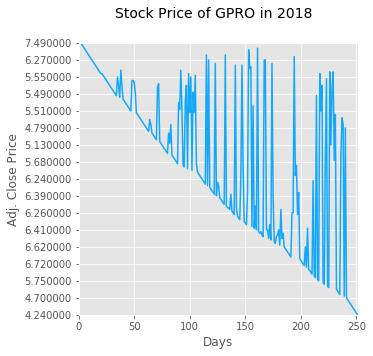

In [8]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

with open('gpro.csv') as filename:
    gprocsv = csv.reader(filename, delimiter=',')
    gprocsv.__next__()
    y = [line[5] for line in gprocsv]
    x = range(1, len(y) + 1)
    plt.style.use('ggplot')
    plt.figure(figsize=(5,5))
    plt.plot(x,y, color = '#14A8F9')
    plt.suptitle('Stock Price of GPRO in 2018', fontsize = 14)
    plt.xlabel('Days', fontsize = 12)
    plt.ylabel('Adj. Close Price', fontsize = 12)
    plt.axis([0, max(x), min(y), max(y)])
    plt.yticks(np.arange(1, 170, step = 10))
    plt.show()

## Part 6: One Hot Encoding

In [1]:
import numpy as np

def one_hot_encoding(lst):
    'Accepts a list of values and returns a list of each value and its corresponding one hot encoding value'
    encode_lst = [[0] * len(lst) for i in lst]
    for i in lst:
        encode_lst[lst.index(i)][lst.index(i)] = 1
    coded_values_lst = [[lst[i], encode_lst[i]] for i in range(len(lst))]
    return coded_values_lst

one_hot_encoding(['alpha','beta', 'gamma'])
one_hot_encoding(['ford','honda', 'toyota', 'mazda', 'subaru'])

[['ford', [1, 0, 0, 0, 0]],
 ['honda', [0, 1, 0, 0, 0]],
 ['toyota', [0, 0, 1, 0, 0]],
 ['mazda', [0, 0, 0, 1, 0]],
 ['subaru', [0, 0, 0, 0, 1]]]

In [11]:
def encode(x):
    x = 1
    
def one_hot_encoding(lst):
    'Accepts a list of values and returns a list of each value and its corresponding one hot encoding value'
    encode_lst = [[0] * len(lst) for i in lst]
    encode_lst2 = [encode(lst[i]) for i in lst if encode_lst[lst.index(i)][lst.index(i)]]
    coded_values_lst = [[lst[i], encode_lst[i]] for i in range(len(lst))]
    return coded_values_lst

one_hot_encoding(['alpha','beta', 'gamma'])
one_hot_encoding(['ford','honda', 'toyota', 'mazda', 'subaru'])

[['ford', [0, 0, 0, 0, 0]],
 ['honda', [0, 0, 0, 0, 0]],
 ['toyota', [0, 0, 0, 0, 0]],
 ['mazda', [0, 0, 0, 0, 0]],
 ['subaru', [0, 0, 0, 0, 0]]]